# Analyze Happiness by Weekday

### Import Data and Libs

In [40]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### 1. Get Weekday from Timestamp

In [41]:
data['Weekday'] = data['Timestamp'].dt.strftime('%a')  
data['Weekday_order'] = data['Timestamp'].dt.day
data.head()

,Course Name,Timestamp,Rating,Comment,Weekday,Weekday_order
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,Fri,2
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,Fri,2
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,Fri,2
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,Fri,2
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,Fri,2


### 2. Arrange Weekdays in Order

In [42]:
def map_weekday_order(s):
    # s is a string
    if s == 'Sun':
        return 0
    elif s == 'Mon':
        return 1
    elif s == 'Tue':
        return 2
    elif s == 'Wed':
        return 3
    elif s == 'Thu':
        return 4
    elif s == 'Fri':
        return 5
    elif s == 'Sat':
        return 6
data['Weekday_order'] = data['Weekday'].apply(map_weekday_order)
data

,Course Name,Timestamp,Rating,Comment,Weekday,Weekday_order
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,Fri,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,Fri,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,Fri,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,Fri,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,Fri,5
...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,Mon,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,Mon,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,Mon,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,Mon,1


In [45]:
avg_rating_weekday = data.groupby(['Weekday_order','Weekday']).mean()
avg_rating_weekday

,,Rating
Weekday_order,Weekday,
0,Sun,4.439097
1,Mon,4.449335
2,Tue,4.446240
3,Wed,4.427452
4,Thu,4.437880
5,Fri,4.455207
6,Sat,4.440274


### 3. Plot it

In [49]:
avg_rating_weekday.index[0][1]

'Sun'

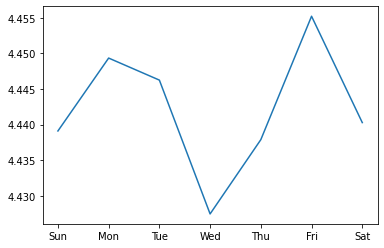

In [51]:
x = [avg_rating_weekday.index[i][1] for i in range(7)]
y = list(avg_rating_weekday['Rating'])
plt.plot(x,y)